PROBLEM -1


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving ts_industry_msme_july2024.csv to ts_industry_msme_july2024.csv
Saving ts_industry_msme_june2024.csv to ts_industry_msme_june2024.csv
Saving ts_industry_msme_aug2024.csv to ts_industry_msme_aug2024.csv
Saving ts_industry_msme_sep2024.csv to ts_industry_msme_sep2024.csv
Saving ts_industry_msme_oct2024.csv to ts_industry_msme_oct2024.csv
Saving ts_industry_msme_nov2024.csv to ts_industry_msme_nov2024.csv
Saving ts_industry_msme_dec2024.csv to ts_industry_msme_dec2024.csv


In [ ]:
import pandas as pd


files = ["ts_industry_msme_june2024.csv", "ts_industry_msme_july2024.csv", "ts_industry_msme_aug2024.csv",
         "ts_industry_msme_sep2024.csv", "ts_industry_msme_oct2024.csv", "ts_industry_msme_nov2024.csv","ts_industry_msme_dec2024.csv"]

df_list = [pd.read_csv(file) for file in files]
combined_msme = pd.concat(df_list, ignore_index=True)

combined_msme.columns = [col.strip().lower().replace(" ", "_") for col in combined_msme.columns]
combined_msme.head()

,unit_name,ie_or_not,industry_category,district_name,mandal_name,employment,line_of_activity,investment,presentstatus,typeofindustry,export,typeofconnection
0,Adilabad Aqua water plant,NO,MICRO,Adilabad,MAVALA (NEW),5,Mineralized water,10.0,Working,Proprietary,No,LT
1,M/s HARIKA PYRO -PRODUCTS,YES,MEGA,Hanumakonda,Khaazipet,8,Tyres and tubes vulcanization/ hot retreating,35.0,Working,Partnership,No,LT
2,SV Exports,YES,SMALL,Hanumakonda,Khaazipet,10,Granite / Stone Cutting and Polishing,284.0,Working,Partnership,No,LT
3,NAKSHATRA GRANITES AND EXPORTS,NO,SMALL,Karimnagar,Gangadhara,15,"Cutting, sizing and polishing of marble stone",302.0,Working,Partnership,No,HT
4,SRI VAISHNAVI INDUSTRIES,NO,SMALL,Karimnagar,Gangadhara,15,Granite / Stone Cutting and Polishing,190.0,Working,Partnership,No,LT


In [ ]:
combined_msme.dropna(subset=['district_name', 'investment', 'employment'], inplace=True)
combined_msme['investment'] = pd.to_numeric(combined_msme['investment'],errors='coerce')
combined_msme['employment'] = pd.to_numeric(combined_msme['employment'],errors='coerce')

combined_msme['export_flag'] = combined_msme['export'].str.strip().str.lower().map({'yes':1,'no':0})
combined_msme['industry_category'] = combined_msme['industry_category'].str.strip().str.upper()


In [ ]:
combined_msme.info()
combined_msme.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   unit_name          299 non-null    object 
 1   ie_or_not          299 non-null    object 
 2   industry_category  299 non-null    object 
 3   district_name      299 non-null    object 
 4   mandal_name        299 non-null    object 
 5   employment         299 non-null    int64  
 6   line_of_activity   299 non-null    object 
 7   investment         299 non-null    float64
 8   presentstatus      299 non-null    object 
 9   typeofindustry     299 non-null    object 
 10  export             299 non-null    object 
 11  typeofconnection   299 non-null    object 
 12  export_flag        299 non-null    int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 30.5+ KB


Index(['unit_name', 'ie_or_not', 'industry_category', 'district_name',
       'mandal_name', 'employment', 'line_of_activity', 'investment',
       'presentstatus', 'typeofindustry', 'export', 'typeofconnection',
       'export_flag'],
      dtype='object')

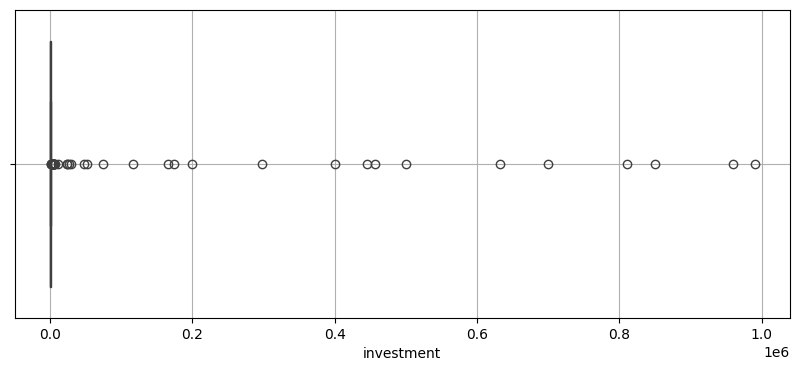

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
sns.boxplot(x=combined_msme['investment'])
plt.grid(True)
plt.show()


In [ ]:
q1 = combined_msme['investment'].quantile(0.25)
q3 = combined_msme['investment'].quantile(0.75)
IQR = q3-q1

lowerbound = q1-1.5*IQR
upperbound = q3+1.5*IQR

msme_summ = combined_msme[
    (combined_msme['investment'] >=lowerbound) &
    (combined_msme['investment'] <=upperbound)
]

In [ ]:
print("Original:", combined_msme.shape[0])
print("Filtered:", msme_summ.shape[0])
print("Removed:", combined_msme.shape[0] - msme_summ.shape[0])


Original: 299
Filtered: 255
Removed: 44


In [ ]:
summary = msme_summ.groupby('district_name').agg({
  'investment':'sum',
  'employment':'sum',
  'export_flag':'sum',
  'unit_name' : 'count'
}).reset_index().rename(columns={'unit_name': 'total_units'})

summary['export_ratio'] = summary['export_flag']/summary['total_units'] *100
summary


,district_name,investment,employment,export_flag,total_units,export_ratio
0,Adilabad,10.00,5,0,1,0.000000
1,Bhadradri Kothagudem,2929.00,73,0,5,0.000000
2,Bhupalpally,95.00,15,0,1,0.000000
3,Gadwal,118.58,20,0,1,0.000000
4,Hanumakonda,5805.69,241,0,23,0.000000
5,Hyderabad,24.00,15,0,1,0.000000
6,Jagtial,1700.00,55,0,4,0.000000
7,Jangaon,1334.00,95,0,6,0.000000
8,Karimnagar,7311.24,370,0,26,0.000000
9,Khammam,1965.00,84,0,7,0.000000


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=summary)

https://docs.google.com/spreadsheets/d/1wr7KN1tydJEpHfugIYo7Az1Uw0M1QtGxvnxnuPZH8no/edit#gid=0


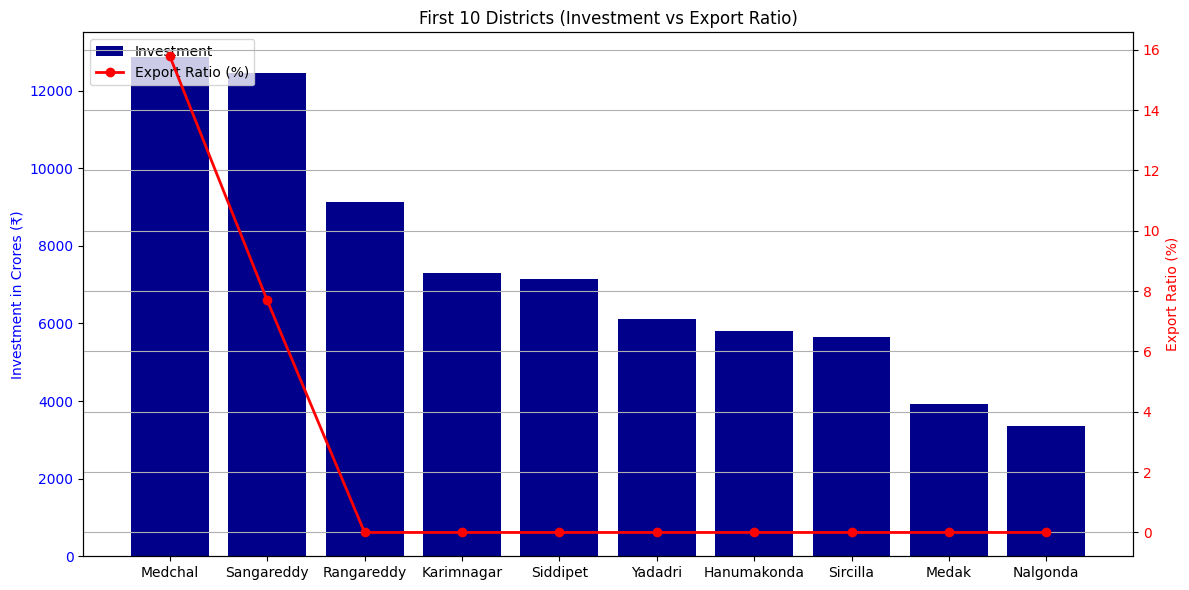

In [ ]:
import matplotlib.pyplot as plt

top10 = summary.sort_values(by='investment', ascending=False).head(10)


fig, ax1 = plt.subplots(figsize=(12,6))

ax1.bar(top10['district_name'], top10['investment'], color='darkblue', label='Investment')
ax1.set_ylabel('Investment in Crores (₹)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(top10['district_name'], top10['export_ratio'] , color='red', marker='o', linewidth=2, label='Export Ratio (%)')
ax2.set_ylabel('Export Ratio (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("First 10 Districts (Investment vs Export Ratio)")
fig.tight_layout()
plt.grid(True)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.show()


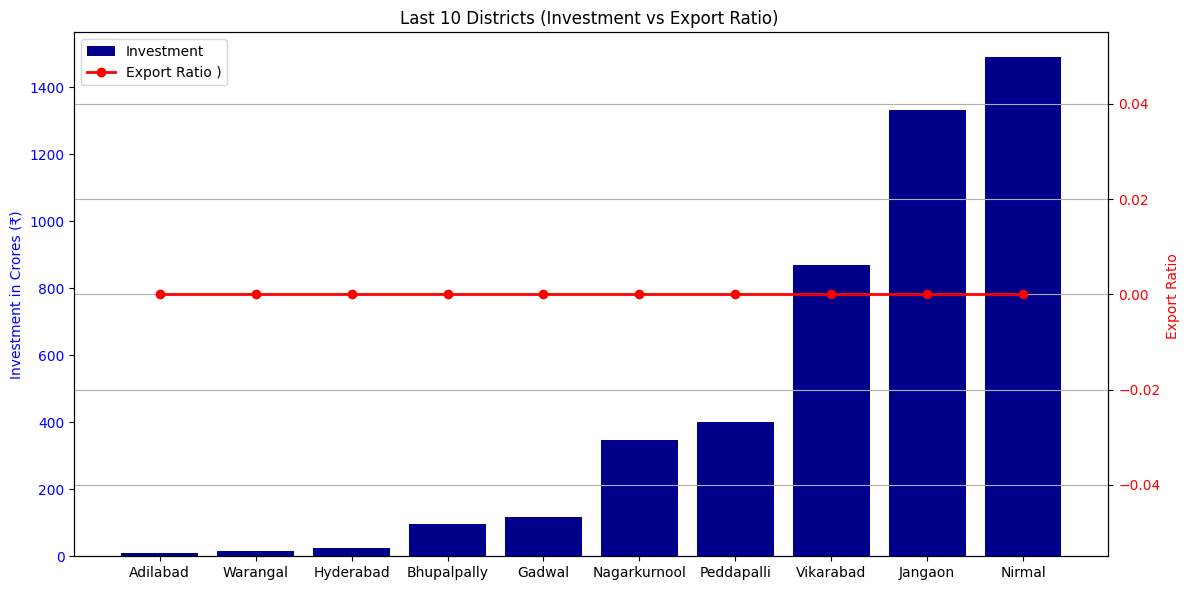

In [ ]:
import matplotlib.pyplot as plt


top10 = summary.sort_values(by='investment', ascending=True).head(10)

fig, ax1 = plt.subplots(figsize=(12,6))


ax1.bar(top10['district_name'], top10['investment'], color='darkblue', label='Investment')
ax1.set_ylabel('Investment in Crores (₹)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')


ax2 = ax1.twinx()
ax2.plot(top10['district_name'], top10['export_ratio'] , color='red', marker='o', linewidth=2, label='Export Ratio )')
ax2.set_ylabel('Export Ratio ', color='red')
ax2.tick_params(axis='y', labelcolor='red')


plt.title("Last 10 Districts (Investment vs Export Ratio) ")
fig.tight_layout()
plt.grid(True)


lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.show()


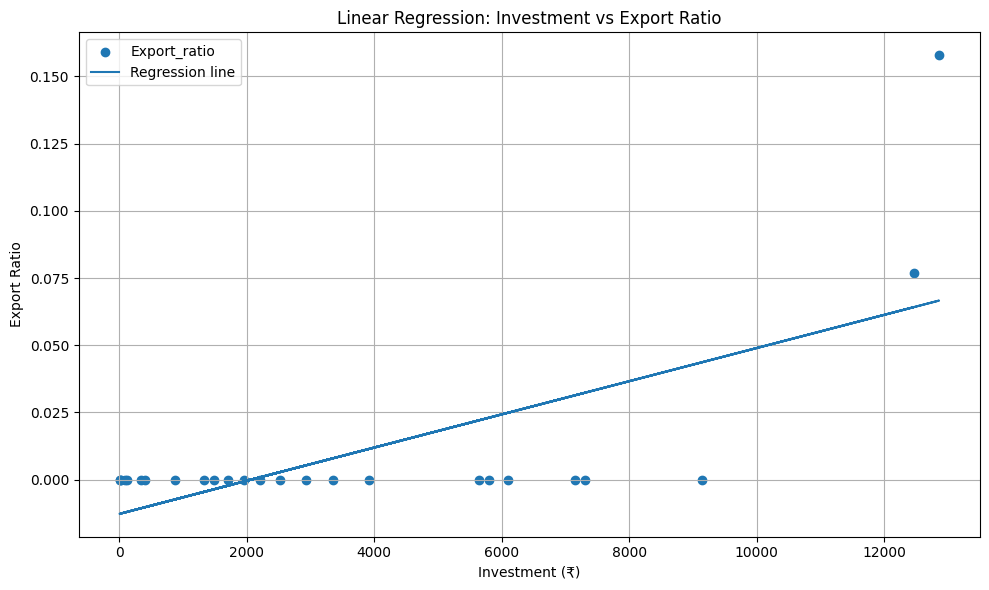

Slope : 6.174531834262292e-06
Intercept: -0.012782024405104706
R² Score: 0.46255234754014884
Correlation: 0.68


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = summary[['investment']].values
y = summary['export_ratio'].values


model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X,y,label='Export_ratio')
plt.plot(X,y_pred,label='Regression line')
plt.xlabel("Investment (₹)")
plt.ylabel("Export Ratio")
plt.title("Linear Regression: Investment vs Export Ratio")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Slope :", model.coef_[0])
print("Intercept:", model.intercept_)
print("R² Score:", model.score(X, y))


corr = summary["investment"].corr(summary["export_ratio"])
print(f"Correlation: {corr:.2f}")



In [ ]:
category_count = msme_summ.groupby(['district_name','industry_category']).size().unstack(fill_value=0).reset_index()
category_count

industry_category,district_name,MEDIUM,MEGA,MICRO,SMALL
0,Adilabad,0,0,1,0
1,Bhadradri Kothagudem,0,0,1,4
2,Bhupalpally,0,0,0,1
3,Gadwal,0,0,0,1
4,Hanumakonda,0,1,6,16
5,Hyderabad,0,0,0,1
6,Jagtial,0,0,3,1
7,Jangaon,0,0,1,5
8,Karimnagar,0,0,2,24
9,Khammam,0,0,3,4


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=category_count)

https://docs.google.com/spreadsheets/d/1q9Qe_11BJelcIc-wsUlXNJmFxEuCmKzUn_MpOjN5DXM/edit#gid=0


In [ ]:
inv_by_category = msme_summ.groupby(["district_name", "industry_category"])["investment"].sum().unstack(fill_value=0).reset_index()
inv_by_category


industry_category,district_name,MEDIUM,MEGA,MICRO,SMALL
0,Adilabad,0.0,0.00,10.00,0.00
1,Bhadradri Kothagudem,0.0,0.00,50.00,2879.00
2,Bhupalpally,0.0,0.00,0.00,95.00
3,Gadwal,0.0,0.00,0.00,118.58
4,Hanumakonda,0.0,35.00,1294.65,4476.04
5,Hyderabad,0.0,0.00,0.00,24.00
6,Jagtial,0.0,0.00,1295.00,405.00
7,Jangaon,0.0,0.00,15.00,1319.00
8,Karimnagar,0.0,0.00,426.24,6885.00
9,Khammam,0.0,0.00,1383.00,582.00


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=inv_by_category)

https://docs.google.com/spreadsheets/d/1Zgpvwpp_-UaCVrNJe6NRdI7SdIra07kxBwEJg201xhI/edit#gid=0


In [ ]:
inv_threshold = summary['investment'].quantile(0.60)
threshold = 0.02
inv_threshold_export = summary[
    (summary['investment'] >= inv_threshold) &
    (summary['export_ratio'] <= threshold)
]
inv_threshold_export[['district_name', 'investment', 'export_ratio']].sort_values(by='investment', ascending=False)

#Medchal	3235.0	0.00	2543.00	7080.87
#1094.0	300.02	2370.00	8698.30

,district_name,investment,export_ratio
17,Rangareddy,9141.52,0.0
8,Karimnagar,7311.24,0.0
19,Siddipet,7152.08,0.0
24,Yadadri,6104.56,0.0
4,Hanumakonda,5805.69,0.0
20,Sircilla,5651.73,0.0
11,Medak,3917.08,0.0
14,Nalgonda,3347.00,0.0


In [ ]:
selected_districts = inv_threshold_export['district_name'].tolist()
filtered_units = msme_summ[msme_summ['district_name'].isin(selected_districts)]
category_count = filtered_units.groupby(['district_name', 'industry_category']).size().unstack(fill_value=0)
print(category_count)


industry_category  MEDIUM  MEGA  MICRO  SMALL
district_name                                
Hanumakonda             0     1      6     16
Karimnagar              0     0      2     24
Medak                   0     0      6      5
Nalgonda                2     0      4      4
Rangareddy              1     0      4     20
Siddipet                0     0      0     12
Sircilla                0     0      8      6
Yadadri                 1     0      0     15


In [ ]:
target_districts = inv_threshold_export['district_name'].tolist()
filtered_msme = msme_summ[msme_summ['district_name'].isin(target_districts)]
inv_by_category = (
    filtered_msme
    .groupby(["district_name", "industry_category"])["investment"]
    .sum()
    .unstack(fill_value=0)
    .reset_index()
)

inv_by_category


industry_category,district_name,MEDIUM,MEGA,MICRO,SMALL
0,Hanumakonda,0.0,35.0,1294.65,4476.04
1,Karimnagar,0.0,0.0,426.24,6885.00
2,Medak,0.0,0.0,1412.65,2504.43
3,Nalgonda,664.0,0.0,1115.00,1568.00
4,Rangareddy,450.0,0.0,1032.12,7659.40
5,Siddipet,0.0,0.0,0.00,7152.08
6,Sircilla,0.0,0.0,3496.73,2155.00
7,Yadadri,800.0,0.0,0.00,5304.56


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=inv_by_category)

https://docs.google.com/spreadsheets/d/1Z1Cw59X9roM-HlCo-jSK1uEvxZ40fnPs4UfQwmSZflI/edit#gid=0


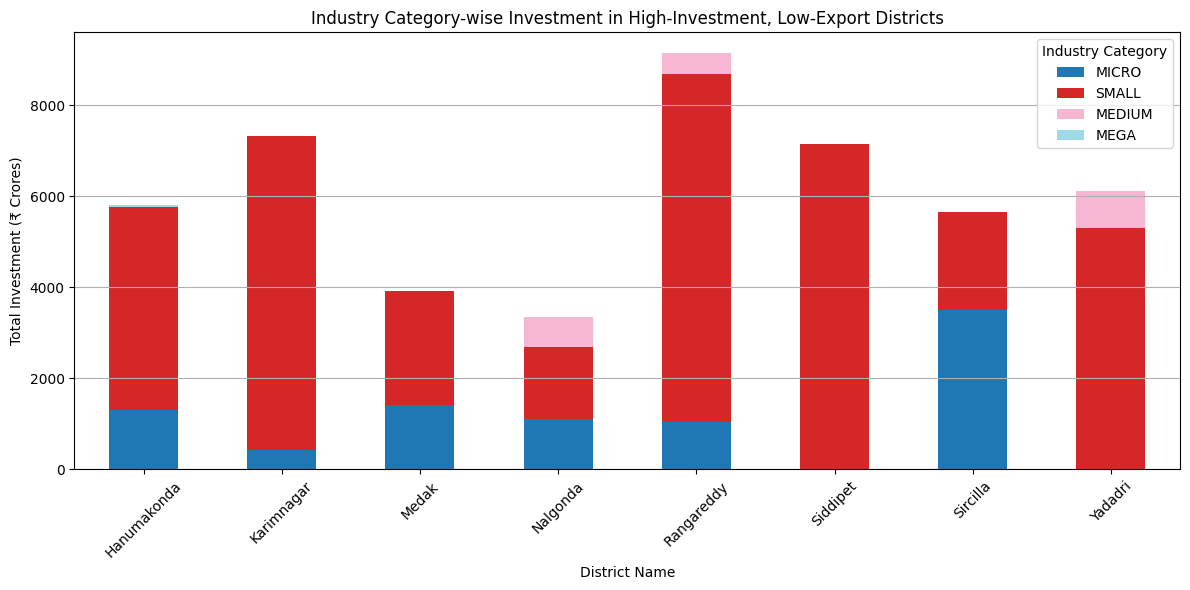

In [ ]:
import matplotlib.pyplot as plt


inv_by_category = inv_by_category[['district_name', 'MICRO', 'SMALL', 'MEDIUM', 'MEGA']]


inv_by_category.set_index('district_name', inplace=True)


inv_by_category.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')

plt.title("Industry Category-wise Investment in High-Investment, Low-Export Districts")
plt.ylabel("Total Investment (₹ Crores)")
plt.xlabel("District Name")
plt.xticks(rotation=45)
plt.legend(title="Industry Category")
plt.tight_layout()
plt.grid(axis='y')

plt.show()


In [ ]:
filtered = msme_summ[msme_summ['district_name'].isin(target_districts)]
ownership_investment = (
    filtered.groupby(['district_name', 'line_of_activity','typeofindustry'])['investment']
    .sum()
    .reset_index()
    .sort_values(by=['district_name', 'investment'], ascending=[True, False])
)
ownership_investment

,district_name,line_of_activity,typeofindustry,investment
6,Hanumakonda,Granite / Stone Cutting and Polishing,Proprietary,1748.00
5,Hanumakonda,Granite / Stone Cutting and Polishing,Partnership,1530.26
3,Hanumakonda,"Cutting, sizing and polishing of marble stone",Proprietary,610.00
2,Hanumakonda,"Cutting, sizing and polishing of marble stone",Partnership,543.78
0,Hanumakonda,Bio fertilizer and bio-pesticides without usin...,Pvt Ltd,483.00
...,...,...,...,...
53,Yadadri,Biomass briquettes (sun drying) without using ...,Proprietary,210.00
60,Yadadri,Granite / Stone Cutting and Polishing,Partnership,195.00
61,Yadadri,Polythene and plastic processed products manuf...,Partnership,185.00
55,Yadadri,Engineering and fabrication units (dry process...,Partnership,147.00


In [ ]:


filtered = msme_summ[msme_summ['district_name'].isin(target_districts)]
ownership_investment = (
    filtered.groupby(['district_name','typeofindustry','industry_category'])['investment']
    .sum()
    .reset_index()
    .sort_values(by=['district_name', 'investment'], ascending=[True, False])
)
ownership_investment


,district_name,typeofindustry,industry_category,investment
1,Hanumakonda,Partnership,SMALL,2289.04
3,Hanumakonda,Proprietary,SMALL,1704.00
2,Hanumakonda,Proprietary,MICRO,1294.65
4,Hanumakonda,Pvt Ltd,SMALL,483.00
0,Hanumakonda,Partnership,MEGA,35.00
6,Karimnagar,Partnership,SMALL,5245.00
7,Karimnagar,Proprietary,SMALL,1640.00
5,Karimnagar,Partnership,MICRO,426.24
12,Medak,Pvt Ltd,SMALL,1646.43
10,Medak,Proprietary,MICRO,1382.65


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=ownership_investment)

https://docs.google.com/spreadsheets/d/1qUuKLS0qB5yEH3AZnGuPv4jw-mQAXEynO39irruUE3w/edit#gid=0


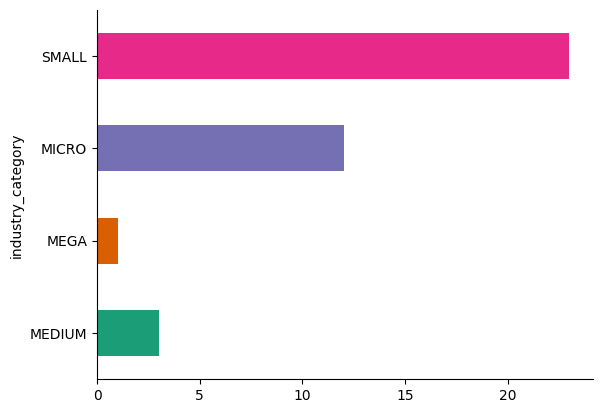

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
ownership_investment.groupby('industry_category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
filtered = msme_summ[msme_summ['district_name'].isin(target_districts)]
ownership_investment = (
    filtered.groupby(['district_name','typeofindustry'])['investment']
    .sum()
    .reset_index()
    .sort_values(by=['district_name', 'investment'], ascending=[True, False])
)
ownership_investment

,district_name,typeofindustry,investment
1,Hanumakonda,Proprietary,2998.65
0,Hanumakonda,Partnership,2324.04
2,Hanumakonda,Pvt Ltd,483.00
3,Karimnagar,Partnership,5671.24
4,Karimnagar,Proprietary,1640.00
6,Medak,Proprietary,1872.65
7,Medak,Pvt Ltd,1646.43
5,Medak,Partnership,398.00
9,Nalgonda,Partnership,1771.00
11,Nalgonda,Pvt Ltd,800.00


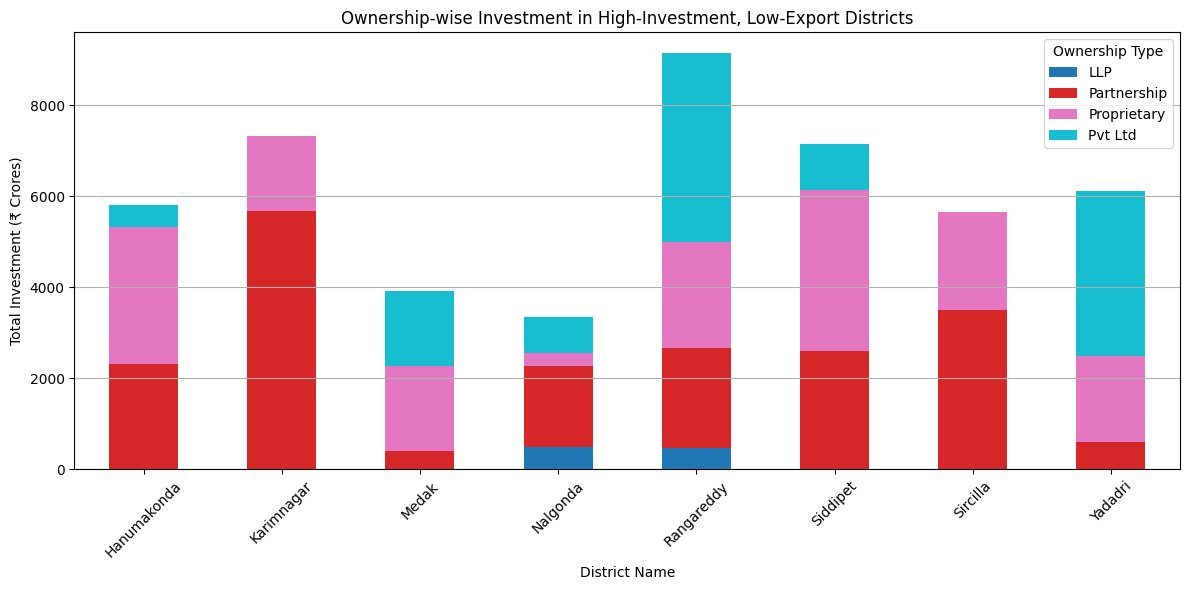

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


pivot_ownership = ownership_investment.pivot(index='district_name', columns='typeofindustry', values='investment').fillna(0)


pivot_ownership.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')

plt.title("Ownership-wise Investment in High-Investment, Low-Export Districts")
plt.ylabel("Total Investment (₹ Crores)")
plt.xlabel("District Name")
plt.xticks(rotation=45)
plt.legend(title="Ownership Type")
plt.tight_layout()
plt.grid(axis='y')

plt.show()


In [ ]:
summary.describe()

,investment,employment,export_flag,total_units,export_ratio
count,25.000000,25.000000,25.000,25.000000,25.000000
mean,3591.322800,335.920000,0.320,10.200000,0.009393
std,3805.177963,737.677997,1.249,10.107753,0.034546
min,10.000000,5.000000,0.000,1.000000,0.000000
25%,400.000000,34.000000,0.000,2.000000,0.000000
50%,2209.000000,95.000000,0.000,7.000000,0.000000
75%,5805.690000,245.000000,0.000,14.000000,0.000000
max,12858.870000,3671.000000,6.000,38.000000,0.157895




```
# This is formatted as code
```

PROBLEM -2


<Figure size 1000x600 with 0 Axes>

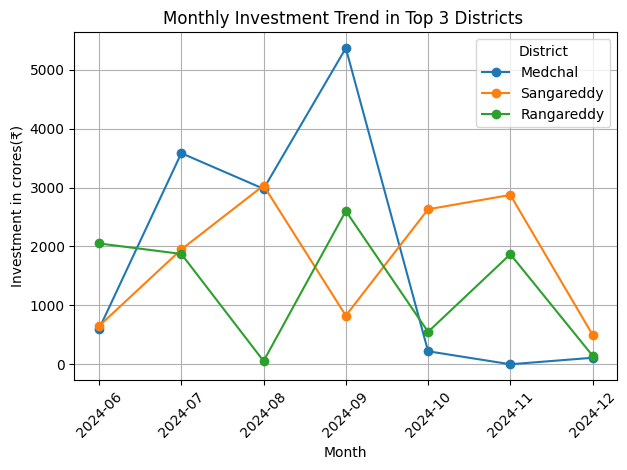

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


files = {
    "2024-06": "ts_industry_msme_june2024.csv",
    "2024-07": "ts_industry_msme_july2024.csv",
    "2024-08": "ts_industry_msme_aug2024.csv",
    "2024-09": "ts_industry_msme_sep2024.csv",
    "2024-10": "ts_industry_msme_oct2024.csv",
    "2024-11": "ts_industry_msme_nov2024.csv",
    "2024-12": "ts_industry_msme_dec2024.csv"
}

dfs = []
for month, file in files.items():
    df = pd.read_csv(file)
    df['month'] = month
    dfs.append(df)

summary = pd.concat(dfs, ignore_index=True)


summary['district_name'] = summary['district_name'].str.strip().str.title()
summary['investment'] = pd.to_numeric(summary['investment'], errors='coerce')

Q1 = summary['investment'].quantile(0.25)
Q3 = summary['investment'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
summary = summary[(summary['investment'] >= lower_bound) & (summary['investment'] <= upper_bound)]


monthly_group = summary.groupby(['month', 'district_name'])['investment'].sum().reset_index()
pivot_df = monthly_group.pivot(index='month', columns='district_name', values='investment').fillna(0)


top3_districts = (
    summary.groupby('district_name')['investment']
    .sum()
    .sort_values(ascending=False)
    .head(3)
    .index
)


plt.figure(figsize=(10, 6))
pivot_df[top3_districts].plot(marker='o')
plt.title("Monthly Investment Trend in Top 3 Districts ")
plt.xlabel("Month")
plt.ylabel("Investment in crores(₹)")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title="District")
plt.tight_layout()
plt.show()


In [ ]:

monthly_group = summary.groupby(['month', 'district_name'])['investment'].sum().reset_index()


top3_districts = (
    summary.groupby('district_name')['investment']
    .sum()
    .sort_values(ascending=False)
    .head(3)
    .index.tolist()
)

monthly_total = monthly_group.groupby('month')['investment'].sum().reset_index(name='total_investment')


monthly_top3 = monthly_group[monthly_group['district_name'].isin(top3_districts)]
monthly_top3_sum = monthly_top3.groupby('month')['investment'].sum().reset_index(name='top3_investment')


share_table = pd.merge(monthly_total, monthly_top3_sum, on='month')
share_table['top3_share_pct'] = (share_table['top3_investment'] / share_table['total_investment']) * 100


share_table


,month,total_investment,top3_investment,top3_share_pct
0,2024-06,11254.85,3300.45,29.324691
1,2024-07,17742.40,7404.72,41.734602
2,2024-08,14301.77,6066.62,42.418666
3,2024-09,16951.83,8791.71,51.862896
4,2024-10,7819.42,3401.60,43.501948
5,2024-11,13605.62,4742.00,34.853244
6,2024-12,8107.18,755.61,9.320257


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=share_table)

https://docs.google.com/spreadsheets/d/1GQ7uFH3s8PhWpuyIzwGuC3-g-YdrqInauYvJhWkXcFU/edit#gid=0


In [ ]:
# all 6months combined
district_investment = summary.groupby('district_name')['investment'].sum().reset_index()
total_investment = district_investment['investment'].sum()
district_investment['investment_pc'] = (district_investment['investment'] / total_investment) * 100
district_investment['investment_pc'] = district_investment['investment_pc'].round(2)
district_investment = district_investment.sort_values(by='investment_pc', ascending=False)
district_investment

,district_name,investment,investment_pc
12,Medchal,12858.87,14.32
18,Sangareddy,12462.32,13.88
17,Rangareddy,9141.52,10.18
8,Karimnagar,7311.24,8.14
19,Siddipet,7152.08,7.97
24,Yadadri,6104.56,6.80
4,Hanumakonda,5805.69,6.47
20,Sircilla,5651.73,6.29
11,Medak,3917.08,4.36
14,Nalgonda,3347.00,3.73


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=district_investment)

https://docs.google.com/spreadsheets/d/1XDL8ogDTAGkE0oXXLsKyUmbClGE15MbniIKuztUj0H8/edit#gid=0


In [ ]:
lowshare_districts = district_investment[district_investment['investment_pc'] < 10]
lowshare_districts

,district_name,investment,investment_pc
8,Karimnagar,7311.24,8.14
19,Siddipet,7152.08,7.97
24,Yadadri,6104.56,6.80
4,Hanumakonda,5805.69,6.47
20,Sircilla,5651.73,6.29
11,Medak,3917.08,4.36
14,Nalgonda,3347.00,3.73
1,Bhadradri Kothagudem,2929.00,3.26
22,Wanaparthy,2526.50,2.81
10,Mahbubnagar,2209.00,2.46


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=lowshare_districts)

https://docs.google.com/spreadsheets/d/17S9pnLEbI7BJzkil6diWyA2d03KTITa7z0z5jqMbKZs/edit#gid=0


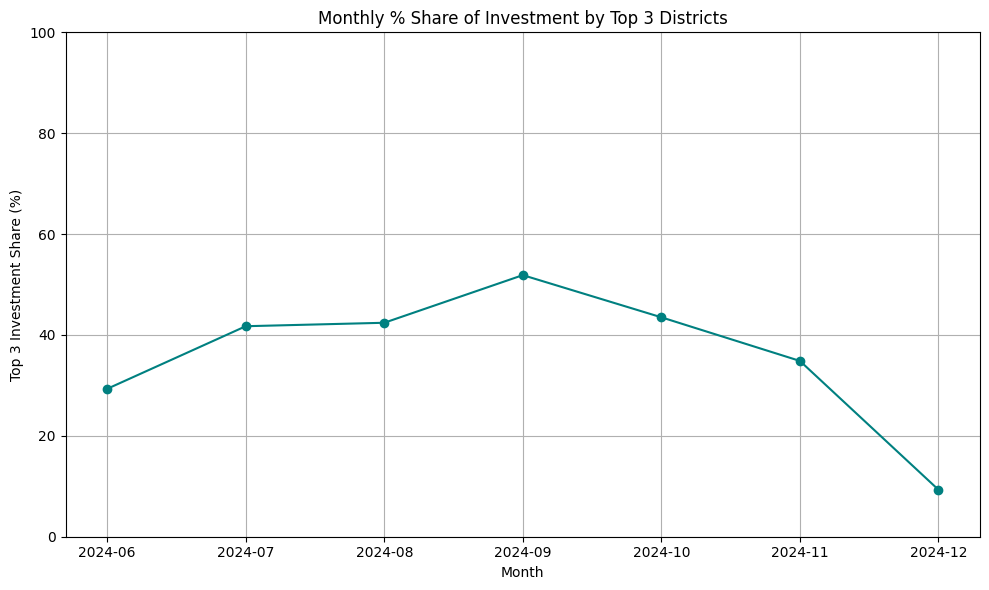

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(share_table['month'], share_table['top3_share_pct'], marker='o', linestyle='-', color='teal')
plt.title("Monthly % Share of Investment by Top 3 Districts")
plt.xlabel("Month")
plt.ylabel("Top 3 Investment Share (%)")
plt.grid(True)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


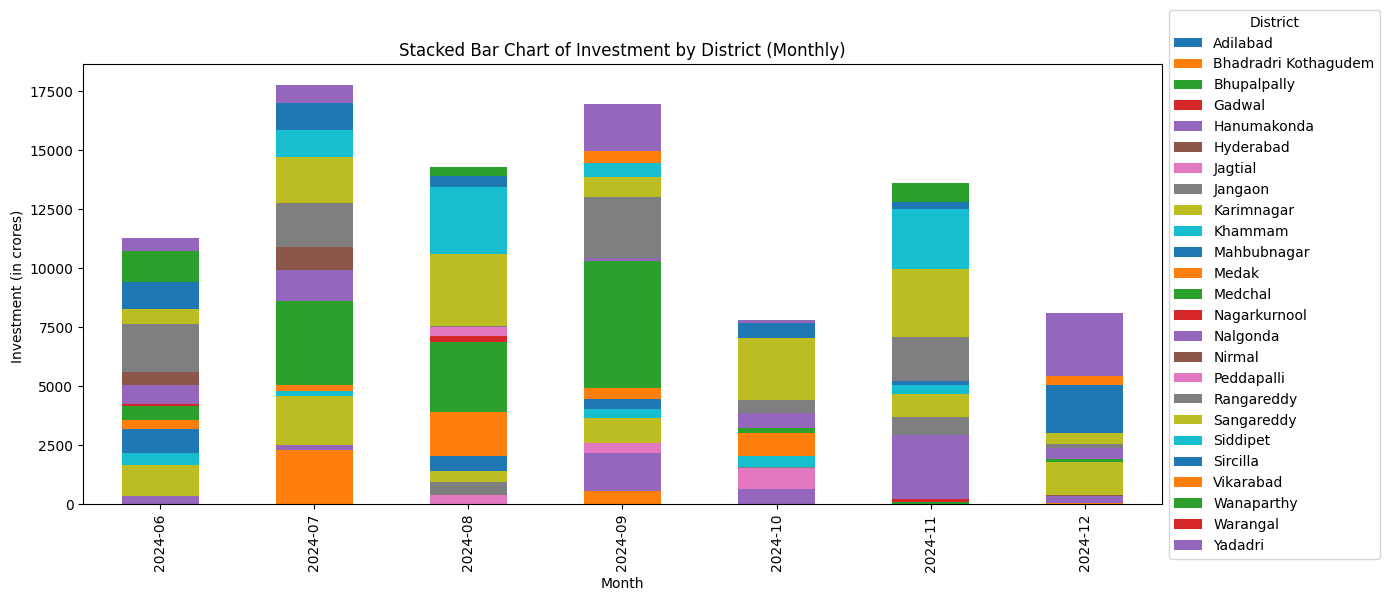

In [ ]:

pivot_df_all = monthly_group.pivot(index='month', columns='district_name', values='investment').fillna(0)
pivot_df_all.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title("Stacked Bar Chart of Investment by District (Monthly)")
plt.ylabel("Investment (in crores) ")
plt.xlabel("Month")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title="District")
plt.tight_layout()
plt.show()


In [ ]:
investment_table = monthly_group.pivot(index='district_name', columns='month', values='investment').fillna(0)
investment_table['Total'] = investment_table.sum(axis=1)

In [ ]:
grand_total = investment_table['Total'].sum()
investment_table['investment_pct(%)'] = (investment_table['Total'] / grand_total) *100
investment_table['investment_pct(%)'] = investment_table['investment_pct(%)'].round(2)

month_cols = [col for col in investment_table.columns if col not in ['Total', 'investment_pct(%)']]

investment_table = investment_table[month_cols + ['Total', 'investment_pct(%)']]
top3 = investment_table.sort_values('Total', ascending=False).head(3).index
filtered_table = investment_table[~investment_table.index.isin(top3)]

filtered_table

month,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12,Total,investment_pct(%)
district_name,,,,,,,,,
Adilabad,10.0,0.00,0.00,0.00,0.00,0.00,0.00,10.00,0.01
Bhadradri Kothagudem,0.0,2307.00,0.00,572.00,0.00,0.00,50.00,2929.00,3.26
Bhupalpally,0.0,0.00,0.00,0.00,0.00,95.00,0.00,95.00,0.11
Gadwal,0.0,0.00,0.00,0.00,0.00,118.58,0.00,118.58,0.13
Hanumakonda,319.0,215.00,0.00,1604.00,640.65,2727.04,300.00,5805.69,6.47
Hyderabad,0.0,0.00,0.00,0.00,0.00,0.00,24.00,24.00,0.03
Jagtial,0.0,0.00,400.00,405.00,895.00,0.00,0.00,1700.00,1.89
Jangaon,0.0,0.00,531.00,0.00,36.00,767.00,0.00,1334.00,1.49
Karimnagar,1348.0,2070.00,450.00,1077.24,0.00,936.00,1430.00,7311.24,8.14


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=filtered_table)

https://docs.google.com/spreadsheets/d/1RavyVoQwuNF3nbLup5Ffr4bAlsj_WkNFSLYXAjqQ_1s/edit#gid=0



***Problem*** 3


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ts_industry_incentives_01-12-2024_31-12-2024.csv to ts_industry_incentives_01-12-2024_31-12-2024.csv
Saving ts_industry_incentives_01-11-2024_30-11-2024.csv to ts_industry_incentives_01-11-2024_30-11-2024.csv
Saving ts_industry_incentives_01-10-2024_31-10-2024.csv to ts_industry_incentives_01-10-2024_31-10-2024.csv
Saving ts_industry_incentives_01-07-2024_31-07-2024 (2).csv to ts_industry_incentives_01-07-2024_31-07-2024 (2).csv
Saving ts_industry_incentives_01-09-2024_30-09-2024.csv to ts_industry_incentives_01-09-2024_30-09-2024.csv
Saving ts_industry_incentives_01-06-2024_30-06-2024.csv to ts_industry_incentives_01-06-2024_30-06-2024.csv
Saving ts_industry_incentives_01-08-2024_31-08-2024.csv to ts_industry_incentives_01-08-2024_31-08-2024.csv


In [ ]:
import pandas as pd

incentive_files = {
    "2024-06": "ts_industry_incentives_01-06-2024_30-06-2024.csv",
    "2024-07": "ts_industry_incentives_01-07-2024_31-07-2024 (2).csv",
    "2024-08": "ts_industry_incentives_01-08-2024_31-08-2024.csv",
    "2024-09": "ts_industry_incentives_01-09-2024_30-09-2024.csv",
    "2024-10": "ts_industry_incentives_01-10-2024_31-10-2024.csv",
    "2024-11": "ts_industry_incentives_01-11-2024_30-11-2024.csv",
    "2024-12": "ts_industry_incentives_01-12-2024_31-12-2024.csv"
}
result = []
for month,file in incentive_files.items():
  df = pd.read_csv(file)
  df['month'] = month
  df['unitname'] = df['unitname'].str.strip().str.lower()
  result.append(df)

incentives_df = pd.concat(result,ignore_index=True)


incentives_df.head()




,district,mandal,village,unitname,unitaddress,incentive_name,month
0,Adilabad,ADILABAD (URBAN),Bhukthapur,hanvate sumedh bhodi,H. NO. 2-2-354 Bhukthapur ADILABAD (URBAN) Adi...,Investment Subsidy,2024-06
1,Adilabad,Bela,Pohar,ade laxmi bai,H.NO.4-38/1 Pohar Bela Adilabad,Investment Subsidy,2024-06
2,Adilabad,Jainad,Kura,sidam shankar,H.NO.2-250 Kura Jainad Adilabad,Investment Subsidy,2024-06
3,Asifabad,Asifabad,Appepalle,kotnaka shankar,HNO 1-64/1 Appepalle Asifabad Asifabad,Investment Subsidy,2024-06
4,Asifabad,Kouthala,Kouthala,mr. durgam janaki rao,HNO 2-34 Kouthala Kouthala Asifabad,Investment Subsidy,2024-06


In [ ]:
incentives_df['unitname'] = incentives_df['unitname'].astype(str).str.strip().str.lower()
incentives_df = incentives_df.dropna(subset=['unitname'])
incentives_df=incentives_df[incentives_df['unitname']!=""]

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ts_industry_msme_aug2024.csv to ts_industry_msme_aug2024 (1).csv
Saving ts_industry_msme_dec2024.csv to ts_industry_msme_dec2024 (1).csv
Saving ts_industry_msme_june2024.csv to ts_industry_msme_june2024 (1).csv
Saving ts_industry_msme_july2024.csv to ts_industry_msme_july2024 (1).csv
Saving ts_industry_msme_nov2024.csv to ts_industry_msme_nov2024 (1).csv
Saving ts_industry_msme_oct2024.csv to ts_industry_msme_oct2024 (1).csv
Saving ts_industry_msme_sep2024.csv to ts_industry_msme_sep2024 (1).csv


In [ ]:
files = {
    "2024-06": "ts_industry_msme_june2024.csv",
    "2024-07": "ts_industry_msme_july2024.csv",
    "2024-08": "ts_industry_msme_aug2024.csv",
    "2024-09": "ts_industry_msme_sep2024.csv",
    "2024-10": "ts_industry_msme_oct2024.csv",
    "2024-11": "ts_industry_msme_nov2024.csv",
    "2024-12": "ts_industry_msme_dec2024.csv"
}

l = []

for month, file in files.items():
    df = pd.read_csv(file)
    df["month"] = month
    l.append(df)

combined_msme = pd.concat(l, ignore_index=True)
combined_msme.head()

,unit_name,ie_or_not,industry_category,district_name,mandal_name,employment,line_of_activity,investment,presentstatus,typeofindustry,export,typeofconnection,month
0,Adilabad Aqua water plant,NO,MICRO,Adilabad,MAVALA (NEW),5,Mineralized water,10.0,Working,Proprietary,No,LT,2024-06
1,M/s HARIKA PYRO -PRODUCTS,YES,MEGA,Hanumakonda,Khaazipet,8,Tyres and tubes vulcanization/ hot retreating,35.0,Working,Partnership,No,LT,2024-06
2,SV Exports,YES,SMALL,Hanumakonda,Khaazipet,10,Granite / Stone Cutting and Polishing,284.0,Working,Partnership,No,LT,2024-06
3,NAKSHATRA GRANITES AND EXPORTS,NO,SMALL,Karimnagar,Gangadhara,15,"Cutting, sizing and polishing of marble stone",302.0,Working,Partnership,No,HT,2024-06
4,SRI VAISHNAVI INDUSTRIES,NO,SMALL,Karimnagar,Gangadhara,15,Granite / Stone Cutting and Polishing,190.0,Working,Partnership,No,LT,2024-06


In [ ]:
combined_msme['unit_name'] = combined_msme['unit_name'].astype(str).str.strip().str.lower()
combined_msme = combined_msme.dropna(subset=['unit_name'])
combined_msme=combined_msme[combined_msme['unit_name']!=""]

In [ ]:

combined_msme['got_incentive'] = combined_msme['unit_name'].isin(incentives_df['unitname']).astype(int)
total_units = len(combined_msme)
units_with_incentives = combined_msme["got_incentive"].sum()
incentive_usage_pct = (units_with_incentives / total_units) * 100

print(f"Total MSMEs : {total_units}")
print(f"Units received incentives: {units_with_incentives}")
print(f"Incentive usage : {incentive_usage_pct:.2f}%")


Total MSMEs : 299
Units received incentives: 125
Incentive usage : 41.81%


In [ ]:

combined_msme['got_incentive'] = combined_msme['unit_name'].isin(incentives_df['unitname']).astype(int)
monthly_aware = combined_msme.groupby("month").agg({
    "unit_name": "count",
    "got_incentive": "sum"
}).reset_index()



monthly_aware = monthly_aware.rename(columns={"unit_name":"total_units"})
monthly_aware["awareness_pact"] = (monthly_aware["got_incentive"] / monthly_aware["total_units"]) * 100
print(monthly_aware)

     month  total_units  got_incentive  awareness_pact
0  2024-06           44             22       50.000000
1  2024-07           59             33       55.932203
2  2024-08           37              5       13.513514
3  2024-09           55             27       49.090909
4  2024-10           32             12       37.500000
5  2024-11           44             17       38.636364
6  2024-12           28              9       32.142857


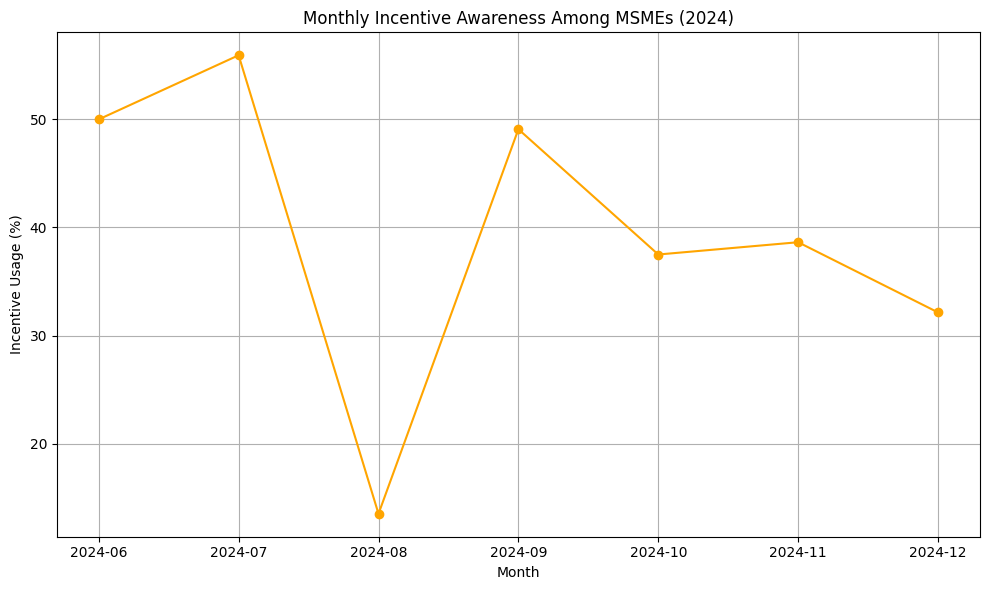

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(monthly_aware["month"], monthly_aware["awareness_pact"], marker='o', color='orange')
plt.title("Monthly Incentive Awareness Among MSMEs (2024)")
plt.xlabel("Month")
plt.ylabel("Incentive Usage (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
incentives_df['district'] = incentives_df['district'].astype(str).str.strip().str.title()

district_incentives = (
    incentives_df.groupby('district')['unitname']
    .count()
    .reset_index()
    .rename(columns={'unitname': 'incentive_count'})
)


In [ ]:
total_incentives = district_incentives['incentive_count'].sum()

district_incentives['incentive_pct'] = (district_incentives['incentive_count'] / total_incentives) * 100
district_incentives['incentive_pct'] = district_incentives['incentive_pct'].round(2)

district_incentives

,district,incentive_count,incentive_pct
0,Adilabad,30,0.43
1,Asifabad,45,0.64
2,Bhadradri Kothagudem,98,1.39
3,Bhupalpally,46,0.65
4,Gadwal,59,0.84
5,Hanumakonda,118,1.67
6,Hyderabad,152,2.15
7,Jagtial,81,1.15
8,Jangaon,71,1.01
9,Kamareddy,125,1.77


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=district_incentives)

https://docs.google.com/spreadsheets/d/1X6zTmvMG9ai4zkVNWel6HvUmugcXfzTteP-eWQivrgs/edit#gid=0


In [ ]:
# Merge to get matched records only
detailed_incentives = pd.merge(
    combined_msme,
    incentives_df[['unitname', 'incentive_name']],
    left_on='unit_name',
    right_on='unitname',
    how='inner'
)


In [ ]:
final_table = detailed_incentives[['unit_name', 'district_name', 'incentive_name']].drop_duplicates()


final_table = final_table.sort_values(by='district_name')
final_table

,unit_name,district_name,incentive_name
53,sri srinivasa sai associates,Bhadradri Kothagudem,Investment Subsidy
135,sahasra converters,Bhadradri Kothagudem,Investment Subsidy
55,abhinav consultancy,Bhadradri Kothagudem,Advance Subsidy before DCP for SC/ST Enterprises
54,sri srinivasa sai associates,Bhadradri Kothagudem,Reimbursement of stamp Duty/Transfer Duty
248,raghavendra irrigations,Gadwal,Investment Subsidy
...,...,...,...
243,pranav enterprises,Yadadri,Investment Subsidy
244,pranav enterprises,Yadadri,Power Cost Reimbursement
245,pranav enterprises,Yadadri,Reimbursement of Mortgage
247,pranav enterprises,Yadadri,Pavalla vaddi


In [ ]:

matched_df = pd.merge(
    combined_msme,
    incentives_df[['unitname', 'incentive_name']],
    left_on='unit_name',
    right_on='unitname',
    how='inner'
)


districts_with_incentives = matched_df['district_name'].dropna().unique()


In [ ]:
all_districts = combined_msme['district_name'].dropna().unique()

got_incentive_set = set(districts_with_incentives)
all_districts_set = set(all_districts)


no_incentive_districts = sorted(all_districts_set - got_incentive_set)


yes_incentive_districts = sorted(got_incentive_set)
print(" Districts that received at least 1 MSME incentive:")
print(yes_incentive_districts)

print("\n Districts with MSMEs but no incentives received:")
print(no_incentive_districts)


 Districts that received at least 1 MSME incentive:
['Bhadradri Kothagudem', 'Gadwal', 'Hanumakonda', 'Jagtial', 'Karimnagar', 'Khammam', 'Mahbubnagar', 'Medak', 'Medchal', 'Nagarkurnool', 'Nalgonda', 'Nirmal', 'Rangareddy', 'Sangareddy', 'Siddipet', 'Sircilla', 'Vikarabad', 'Wanaparthy', 'Yadadri']

 Districts with MSMEs but no incentives received:
['Adilabad', 'Bhupalpally', 'Hyderabad', 'Jangaon', 'Peddapalli', 'Suryapet', 'Warangal']


In [ ]:
print(f"\nTotal districts in MSME data: {len(all_districts_set)}")
print(f"Districts that received incentives: {len(yes_incentive_districts)}")
print(f"Districts with no incentives: {len(no_incentive_districts)}")



Total districts in MSME data: 26
Districts that received incentives: 19
Districts with no incentives: 7


In [ ]:

district_stats = (
    combined_msme
    .groupby('district_name')
    .agg(
        total_msmes=('unit_name', 'count'),
        got_incentives=('got_incentive', 'sum')
    )
    .reset_index()
)


district_stats['incentive_pct'] = (
    district_stats['got_incentives'] / district_stats['total_msmes']
) * 100


district_stats = district_stats.sort_values(by='total_msmes', ascending=False)

print(district_stats)


           district_name  total_msmes  got_incentives  incentive_pct
12               Medchal           44              13      29.545455
18            Sangareddy           35              13      37.142857
17            Rangareddy           30              14      46.666667
8             Karimnagar           26              20      76.923077
4            Hanumakonda           25              11      44.000000
19              Siddipet           18               3      16.666667
25               Yadadri           17              11      64.705882
20              Sircilla           15               7      46.666667
11                 Medak           15               4      26.666667
14              Nalgonda           11               3      27.272727
23            Wanaparthy            7               3      42.857143
22             Vikarabad            7               3      42.857143
15                Nirmal            7               6      85.714286
9                Khammam          

In [ ]:
combined_msme[combined_msme['district_name'].isin([
    'Bhadradri Kothagudem', 'Gadwal', 'Hanumakonda', 'Jagtial', 'Karimnagar', 'Khammam', 'Mahbubnagar', 'Medak', 'Medchal', 'Nagarkurnool', 'Nalgonda', 'Nirmal', 'Rangareddy', 'Sangareddy', 'Siddipet', 'Sircilla', 'Vikarabad', 'Wanaparthy', 'Yadadri'
])].groupby(['district_name', 'industry_category']).size().reset_index(name='count')


,district_name,industry_category,count
0,Bhadradri Kothagudem,MICRO,1
1,Bhadradri Kothagudem,SMALL,4
2,Gadwal,SMALL,1
3,Hanumakonda,MEGA,1
4,Hanumakonda,MICRO,7
5,Hanumakonda,SMALL,17
6,Jagtial,LARGE,1
7,Jagtial,MICRO,3
8,Jagtial,SMALL,2
9,Karimnagar,MICRO,2
